<a href="https://colab.research.google.com/github/bhomaidan1990/Computer_Vision_Labs/blob/main/CV_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision, Lab(3)
## construct sliding windows multi-scale

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


image size: (449, 298, 3)


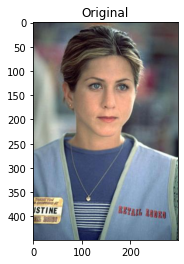

In [ ]:
import os
import cv2
import math
import imutils
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
imgPath = "/content/drive/My Drive/Colab Notebooks/Dataset/originalPics/2002/08/06/big/img_2812.jpg"

img = cv2.imread(imgPath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Original')
print('image size:',img.shape)

image size (449, 298, 3)
image size (225, 149, 3)
image size (113, 75, 3)
image size (57, 38, 3)


<Figure size 432x288 with 0 Axes>

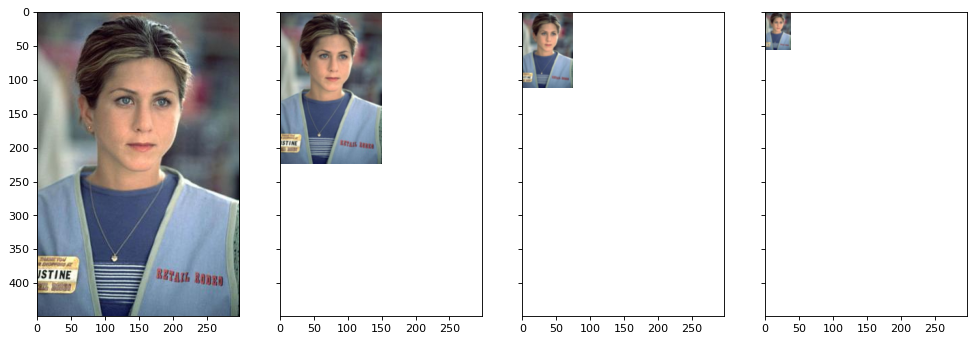

In [ ]:
# Down sampling
plt.figure()
pyramid = []
dst = img
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,8),dpi=80,sharex=True,sharey=True)

pyramid.append(dst)
for i in range(0,3):
    dst = cv2.pyrDown(dst)
    pyramid.append(dst)

for i in range(len(pyramid)-1,-1,-1):
    print('image size',pyramid[len(pyramid)-1-i].shape) # reduce 1/2 image size recursively
    ax[i].imshow(pyramid[i])  

image size (898, 596, 3)


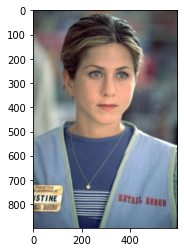

In [ ]:
#Up sampling
plt.figure()
dst = cv2.pyrUp(img)
plt.imshow(dst)
print("image size", dst.shape)

image size (57, 38, 3)
image size (114, 76, 3)
image size (228, 152, 3)
image size (456, 304, 3)


<Figure size 432x288 with 0 Axes>

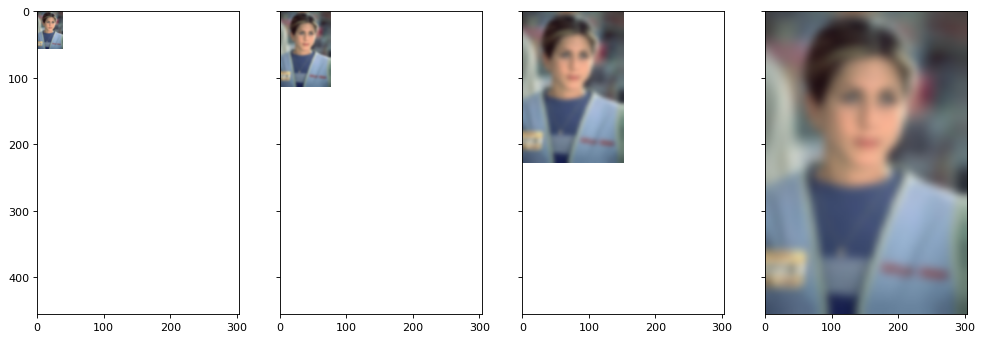

In [ ]:
# UP sampling 
plt.figure()
dst = pyramid[3]
pyramid = []
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,8),dpi=80,sharex=True,sharey=True)
pyramid.append(dst)
for i in range(0,3): 
    dst = cv2.pyrUp(dst)
    pyramid.append(dst)

for i in range(len(pyramid)):
    print('image size',pyramid[i].shape) # reduce 1/2 image size recursively
    ax[i].imshow(pyramid[i]) 

up sampling and down simpleing inversible process

## Gaussian with intermediate scale
### Gaussian smoothing(example in gray image)

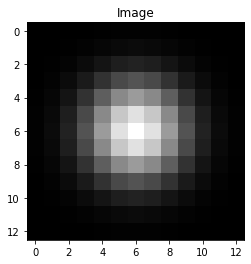

Found 3 Channels:(449, 298, 3)
Converted to Gray Channel Size:(449, 298)
Kernel Shape: (13, 13)


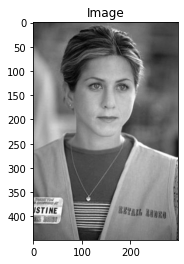

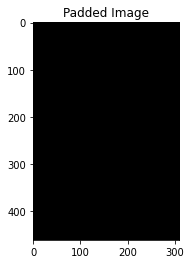

NameError: ignored

In [ ]:
def dnorm(x,mu,sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) /2)
                                                    
def gaussian_kernel(size,sigma=2,verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size) 

    for i in range(size):
        kernel_1D[i] =dnorm(kernel_1D[i], 0, sigma)
        
    #Compute the outer product of two vectors
    kernel_2D=np.outer(kernel_1D.T, kernel_1D.T)
    
    #Normalize
    kernel_2D *= 1.0 / kernel_2D.max()

    if verbose:
        plt.figure()
        plt.imshow(kernel_2D, interpolation="none", cmap="gray")
        plt.title("Image")
        plt.show()

    return kernel_2D
    print(gaussian_kernel(5,sigma=2,verbose=True))

# perform convolution and average
def convolution (image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels:{}".format(image.shape))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel Size:{}".format(image.shape))
    else:
        print("Image Shape: {}".format(image.shape))
    print("Kernel Shape: {}".format(kernel.shape))

    if verbose:
        plt.figure()
        plt.imshow(image, cmap="gray")
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
    output =np.zeros(image.shape)
    
    pad_height=int((kernel_row-1)/2)
    pad_width=int((kernel_col-1)/2)

    padded_image=np.zeros((image_row + (2  *pad_height), image_col + (2*pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[l] - pad_width] = image
 
    if verbose:
        plt.figure()
        plt.imshow(padded_image, cmap="gray")
        plt.title("Padded Image")
        plt.show()
    # 1D gaussian
    for row in range (image_row):
        for col in range (image_col):
            output[row,col] = np.sum(kernel * padded_image[row:row +kenel_row,col:col + kernel_col])
            if average:
                output[row,col] /= kernel.shape[0] * kernel.shape[1]
            
    #  print("Output Image size:{}".format(output.shape))

    if verbose:
        plt.figure()
        plt.imshow(output, cmap="gray")
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()

    return output
# Gaussian smoothing
def gaussian_blur(image,kernel_size,verbose=False):
    kernel = gaussian_kernel(kernel_size,sigma=2,verbose=verbose)
    return convolution(image,kernel,average=True,verbose=verbose)    

image = cv2.imread(imgPath)
gaussian_blur(image,13,verbose=True) # kernel size equals 13

#-----------------
# Gaussian image, a boundery, it is very remarkable that information is not lost
# 
#-----------------

## Method 1 using imutile library

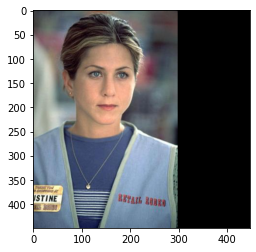

In [ ]:
def pyramid_single(image, scale=30):
    #compute the new dimensions of the image and resize it  w=int (image shape [1] scale)  #Gaussian smoothing
    w = int(image.shape[1] / scale)
    #Gaussian smoothing 
    image =cv2.GaussianBlur(image,(13, 13), 2)
    #down sampling
    image =imutils.resize(image, width=w)
    return image

def pyramid(image, scale=1.5, minSize=(30, 30)):
    #yield the original image
    yield image/255 
    #keep Looping over the pyramid
    while True:
        #compute the new dimensions of the image and resize it  
        w = int(image.shape[1] / scale)
        #Gaussian smoothing ref https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
        image = cv2.GaussianBlur(image,(13,13),2)
        image = imutils.resize(image,width=1)
        #if the resized image does not meet the supplied mininum size ,then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        #yield the enxt image in the pyramid
        yield image/255  #clipping input data to the valid ange for iumshow with RGB data[0...1]


pyramid = tuple(pyramid(img,scale=2))
rows, cols,dim = img.shape

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)
composite_image[:rows,:cols,:] = pyramid[0]

i_row = 0
for p in pyramid[1:]: 
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig,ax = plt.subplots()
ax.imshow(composite_image)
plt.show()  

In [ ]:
# import the necessary packages
import imutils
def pyramid(image, scale=1.5, minSize=(30, 30)):
	# yield the original image 
	yield image
	# keep looping over the pyramid
	while True:
		# compute the new dimensions of the image and resize it
		w = int(image.shape[1] / scale)
		image = imutils.resize(image, width=w)
		# if the resized image does not meet the supplied minimum
		# size, then stop constructing the pyramid
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break
		# yield the next image in the pyramid
		yield image
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])


## Method2 using scikit-image library

In [ ]:
from skimage import transform

rows, cols,dim = img.shape
pyramid = tuple(transform.pyramid_gaussian(img,downscale=2,sigma=2,multichannel=True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)
composite_image[:rows,:cols,:] = pyramid[0]

i_row = 0
for p in pyramid[1:]: 
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig,ax = plt.subplots()
ax.imshow(composite_image)
plt.show()  


ValueError: ignored

## Lapacian pyramid

(448, 298, 3) (448, 298, 3)


ValueError: ignored

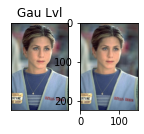

In [ ]:
 # color value range
cRange = 256
 
 # Pyramid level
level = 4

#original image at the bottom of gaussian pyramid
higherResoGauss = img
plt.subplot(2, 1 + level, 1)
plt.imshow(higherResoGauss)
plt.title('Gau Lvl')
plt.xticks([])
plt.yticks([])

for l in range (level):
    rows, cols, channels = higherResoGauss.shape
    
    #delete Last odd row of gaussian image
    if rows % 2 ==1:
        higherResoGauss = higherResoGauss[:rows-1,:]
    #delete Last odd column of gaussian image
    if cols % 2 ==1:
        higherResoGauss = higherResogGuss[:,:cols-1]
    #gaussian image
    lowerResoGauss = cv2.pyrDown(higherResoGauss)
    # even rows and cols in up-sampled image
    temp =cv2.pyrUp(lowerResoGauss)
    print(higherResoGauss.shape, temp.shape)
    
    # Laplacian image
    LowerResoLap = higherResoGauss - temp
    #display gaussian and Laplacian pyram
    plt.subplot(2,1 + level,l + 2)
    plt.imshow(lowerResoGauss)
    plt.title('Gau lvl' + 'd%' % (l+1))
    plt.xticks([]) 

    plt.subplot(2,1 + level,1 + level + l + 2)
    plt.imshow(lowerResoLap)
    plt.title('lap lvl'+'%d'% (l))
    plt.yticket([])

    higherResoGauss = LowerResoGauss

    plt.show()